In [18]:
import pandas as pd         # for working with tables (DataFrames)
import numpy as np          # for math things like log()
from sklearn.model_selection import train_test_split  # for splitting data



In [5]:
horror_data = pd.read_csv('horror_data_master_v10_final_only.csv')

In [7]:
horror_data.head()

,tconst,title_final,year_final,release_date_final2,runtime_final,language_final,region_final,rating_imdb_final,votes_imdb_final,rated_final,budget_final,budget_final_source,revenue_domestic_final,revenue_international_final,revenue_worldwide_final,revenue_total_final,revenue_total_final_source
0,tt0003419,The Student of Prague,1913.0,1913-08-22,83.0,en,US,6.4,2616.0,Approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0003643,The Avenging Conscience: or 'Thou Shalt Not Kill',1914.0,1914-08-02,78.0,ja,US,6.4,1549.0,Not Rated,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0004013,The Ghost Breaker,1914.0,1914-12-07,60.0,NaN,US,4.7,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0004026,The Golem,1914.0,1915-01-15,60.0,ja,US,6.7,1305.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0004121,The Hound of the Baskervilles (1914),1914.0,1914-06-12,65.0,en,AT,5.6,183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
horror_data.columns

Index(['tconst', 'title_final', 'year_final', 'release_date_final2',
       'runtime_final', 'language_final', 'region_final', 'rating_imdb_final',
       'votes_imdb_final', 'rated_final', 'budget_final',
       'budget_final_source', 'revenue_domestic_final',
       'revenue_international_final', 'revenue_worldwide_final',
       'revenue_total_final', 'revenue_total_final_source'],
      dtype='object')

In [20]:
#adding the release month column

#need to convert release date from a string to a date object
horror_data['release_date_final2'] = pd.to_datetime(horror_data['release_date_final2'], errors = 'coerce')

horror_data['release_month_final'] = horror_data['release_date_final2'].dt.month #getting the month from the date

horror_data[['release_date_final2', 'release_month_final']].head()

,release_date_final2,release_month_final
0,1913-08-22,8.0
1,1914-08-02,8.0
2,1914-12-07,12.0
3,1915-01-15,1.0
4,1914-06-12,6.0


In [26]:
horror_data.to_csv("horror_data_master_v11.csv", index=False)


In [28]:
horror_data = pd.read_csv('horror_data_master_v11.csv')

horror_data.head()

,tconst,title_final,year_final,release_date_final2,runtime_final,language_final,region_final,rating_imdb_final,votes_imdb_final,rated_final,budget_final,budget_final_source,revenue_domestic_final,revenue_international_final,revenue_worldwide_final,revenue_total_final,revenue_total_final_source,release_month_final
0,tt0003419,The Student of Prague,1913.0,1913-08-22,83.0,en,US,6.4,2616.0,Approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1,tt0003643,The Avenging Conscience: or 'Thou Shalt Not Kill',1914.0,1914-08-02,78.0,ja,US,6.4,1549.0,Not Rated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
2,tt0004013,The Ghost Breaker,1914.0,1914-12-07,60.0,NaN,US,4.7,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0
3,tt0004026,The Golem,1914.0,1915-01-15,60.0,ja,US,6.7,1305.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,tt0004121,The Hound of the Baskervilles (1914),1914.0,1914-06-12,65.0,en,AT,5.6,183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0


In [30]:
valid_rows = horror_data.dropna(subset=['revenue_total_final', 'budget_final'])
len(valid_rows)


4094

In [32]:
# I want to only use movies that have rev and budget data
horror_model = horror_data.dropna(subset=['revenue_total_final', 'budget_final'])

horror_model.shape


(4094, 18)

### Filling some NaNs

In [36]:
# checking data
model_features = [
    'revenue_total_final',
    'budget_final',
    'rating_imdb_final',
    'votes_imdb_final',
    'runtime_final',
    'language_final',
    'region_final',
    'release_month_final'
]

model_subset = horror_model[model_features].copy()

model_subset.isna().sum()



revenue_total_final      0
budget_final             0
rating_imdb_final      568
votes_imdb_final       564
runtime_final          474
language_final         291
region_final           225
release_month_final      2
dtype: int64

I will fill in rating_imdb_final with the mean rating because ratings are on a narrow, continuous scale and using the average is a neutral replacement that doesn’t skew the overall distribution.

In [39]:
mean_rating = model_subset['rating_imdb_final'].mean()
model_subset['rating_imdb_final'] = model_subset['rating_imdb_final'].fillna(mean_rating)


I will fill in runtime_final with the median runtime because runtimes have a few extreme values, and the median is a robust central value that represents a typical movie length without being pulled by outliers.

In [41]:
median_runtime = model_subset['runtime_final'].median()
model_subset['runtime_final'] = model_subset['runtime_final'].fillna(median_runtime)


I will fill in votes_imdb_final with 0 because a missing vote count most likely means a movie has very few or no recorded votes, so treating missing values as zero is a conservative and realistic assumption.

In [43]:
model_subset['votes_imdb_final'] = model_subset['votes_imdb_final'].fillna(0)


I will fill in language_final with the category "Unknown" because missing language information reflects incomplete metadata rather than a special type of movie, and giving it its own label lets the model treat these cases as a separate group.

In [45]:
model_subset['language_final'] = model_subset['language_final'].fillna("Unknown")


I will fill in region_final with the category "Unknown" because missing region values also come from incomplete records, and assigning them to an "Unknown" group preserves those rows without pretending they belong to a specific country.

In [47]:
model_subset['region_final'] = model_subset['region_final'].fillna("Unknown")


I will fill in release_month_final with the median release month because only two rows are missing and using the middle month keeps those movies in a reasonable position within the calendar without creating a separate category just for a tiny number of cases.

In [49]:
median_month = model_subset['release_month_final'].median()
model_subset['release_month_final'] = model_subset['release_month_final'].fillna(median_month)


In [51]:
#checking after filling
model_subset.isna().sum()

revenue_total_final    0
budget_final           0
rating_imdb_final      0
votes_imdb_final       0
runtime_final          0
language_final         0
region_final           0
release_month_final    0
dtype: int64

Might delete


I filled missing values in the simple columns with safe, neutral values. This doesn’t distort the data because these columns follow tight, consistent ranges, and using the mean or median is a common practice to keep the model stable and avoid losing important rows.

### Log transform numbers because models struggle with large uneven numbers

Revenue, budget, and IMDb vote counts are extremely skewed, with a small number of movies having very high values. To stabilize these distributions and make the relationships easier for models to learn, I created log-transformed versions of these numeric features using log1p, which safely handles zeros

In [53]:


# Apply log1p = log(1 + value), safe for zeros
model_subset['log_revenue'] = np.log1p(model_subset['revenue_total_final'])
model_subset['log_budget'] = np.log1p(model_subset['budget_final'])
model_subset['log_votes']  = np.log1p(model_subset['votes_imdb_final'])


In [55]:
#sanity check

model_subset[['revenue_total_final', 'log_revenue',
              'budget_final', 'log_budget',
              'votes_imdb_final', 'log_votes']].head()


,revenue_total_final,log_revenue,budget_final,log_budget,votes_imdb_final,log_votes
420,2616000.0,14.777157,724805.0,13.493659,5375.0,8.589700
421,5000000.0,15.424949,210000.0,12.254868,9448.0,9.153664
425,23750000.0,16.983093,658000.0,13.396962,21748.0,9.987323
427,270.0,5.602119,800000.0,13.592368,12428.0,9.427788
434,1000000.0,13.815512,16000.0,9.680406,5724.0,8.652598


### One hot encoding categorical columns

Because models can’t read words, I converted the categorical columns into new columns of 0s and 1s. Each category gets its own column, which lets the model use the information without thinking one category is bigger or smaller than another

In [59]:
categorical_cols = ['language_final', 'region_final', 'release_month_final']

model_encoded = pd.get_dummies(
    model_subset,
    columns=categorical_cols,
    drop_first=True # drop_first=True removes one dummy per category to avoid redundant columns and multicollinearity
)

model_encoded.head()


,revenue_total_final,budget_final,rating_imdb_final,votes_imdb_final,runtime_final,log_revenue,log_budget,log_votes,language_final_ar,language_final_bg,...,release_month_final_3.0,release_month_final_4.0,release_month_final_5.0,release_month_final_6.0,release_month_final_7.0,release_month_final_8.0,release_month_final_9.0,release_month_final_10.0,release_month_final_11.0,release_month_final_12.0
420,2616000.0,724805.0,6.4,5375.0,76.0,14.777157,13.493659,8.589700,False,False,...,False,False,False,False,False,True,False,False,False,False
421,5000000.0,210000.0,6.6,9448.0,80.0,15.424949,12.254868,9.153664,False,False,...,False,False,False,True,False,False,False,False,False,False
425,23750000.0,658000.0,7.0,21748.0,88.0,16.983093,13.396962,9.987323,False,False,...,False,True,False,False,False,False,False,False,False,False
427,270.0,800000.0,6.5,12428.0,81.0,5.602119,13.592368,9.427788,False,False,...,False,False,False,True,False,False,False,False,False,False
434,1000000.0,16000.0,3.0,5724.0,66.0,13.815512,9.680406,8.652598,False,False,...,False,False,False,True,False,False,False,False,False,False


In [62]:
model_encoded[[col for col in model_encoded.columns 
               if 'language_final_' in col 
               or 'region_final_' in col
               or 'release_month_final_' in col]].head()


,language_final_ar,language_final_bg,language_final_bn,language_final_bs,language_final_ca,language_final_cs,language_final_da,language_final_de,language_final_en,language_final_es,...,release_month_final_3.0,release_month_final_4.0,release_month_final_5.0,release_month_final_6.0,release_month_final_7.0,release_month_final_8.0,release_month_final_9.0,release_month_final_10.0,release_month_final_11.0,release_month_final_12.0
420,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
421,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
425,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
427,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
434,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False


In [68]:
model_encoded.columns

Index(['revenue_total_final', 'budget_final', 'rating_imdb_final',
       'votes_imdb_final', 'runtime_final', 'log_revenue', 'log_budget',
       'log_votes', 'language_final_ar', 'language_final_bg',
       ...
       'release_month_final_3.0', 'release_month_final_4.0',
       'release_month_final_5.0', 'release_month_final_6.0',
       'release_month_final_7.0', 'release_month_final_8.0',
       'release_month_final_9.0', 'release_month_final_10.0',
       'release_month_final_11.0', 'release_month_final_12.0'],
      dtype='object', length=102)

### Splitting the data

In [71]:
# Target variable
y = model_encoded['log_revenue']

# Features: all columns except revenue and log_revenue
X = model_encoded.drop(columns=['revenue_total_final', 'log_revenue'])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


Baseline Model

In [76]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

# baseline prediction value
baseline_pred_value = y_train.mean()

# baseline predictions (always predict mean)
y_train_baseline = np.full_like(y_train, fill_value=baseline_pred_value, dtype=float)
y_test_baseline  = np.full_like(y_test,  fill_value=baseline_pred_value, dtype=float)

# metrics
baseline_rmse = root_mean_squared_error(y_test, y_test_baseline)
baseline_mae  = mean_absolute_error(y_test, y_test_baseline)
baseline_r2   = r2_score(y_test, y_test_baseline)

baseline_rmse, baseline_mae, baseline_r2


(7.190251911010731, 6.7534548472737335, -3.3390601739125003e-06)

#### Linear Reg model

In [108]:
from sklearn.linear_model import LinearRegression
# 1. Train
lr = LinearRegression()
lr.fit(X_train, y_train)

# 2. Training evaluation
y_train_pred_lr = lr.predict(X_train)
rmse_lr_train = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
mae_lr_train = np.mean(np.abs(y_train - y_train_pred_lr))
r2_lr_train = r2_score(y_train, y_train_pred_lr)

print("Linear Regression training:")
print("RMSE:", rmse_lr_train)
print("MAE:", mae_lr_train)
print("R2:", r2_lr_train)

# 3. Testing evaluation
y_test_pred_lr = lr.predict(X_test)
rmse_lr_test = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
mae_lr_test = np.mean(np.abs(y_test - y_test_pred_lr))
r2_lr_test = r2_score(y_test, y_test_pred_lr)

print("\nLinear Regression test:")
print("RMSE:", rmse_lr_test)
print("MAE:", mae_lr_test)
print("R2:", r2_lr_test)


Linear Regression training:
RMSE: 3.7699651214163343
MAE: 2.915595851223978
R2: 0.7221973495748375

Linear Regression test:
RMSE: 4.001439805164647
MAE: 3.041305590684575
R2: 0.6902967135998924


## Random Forest

In [110]:
from sklearn.ensemble import RandomForestRegressor

# Create model
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

# training
y_train_pred_rf = rf.predict(X_train)
rmse_rf_train = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
mae_rf_train = np.mean(np.abs(y_train - y_train_pred_rf))
r2_rf_train = r2_score(y_train, y_train_pred_rf)

print("Random Forest train:")
print("RMSE:", rmse_rf_train)
print("MAE:", mae_rf_train)
print("R2:", r2_rf_train)

# testing
y_test_pred_rf = rf.predict(X_test)
rmse_rf_test = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
mae_rf_test = np.mean(np.abs(y_test - y_test_pred_rf))
r2_rf_test = r2_score(y_test, y_test_pred_rf)

print("\nRandom Forest test:")
print("RMSE:", rmse_rf_test)
print("MAE:", mae_rf_test)
print("R2:", r2_rf_test)


Random Forest train:
RMSE: 1.3404335105552505
MAE: 0.8179642948245262
R2: 0.9648801806345559

Random Forest test:
RMSE: 3.6759300480602866
MAE: 2.233318090600864
R2: 0.7386348287322202


## Gradient Boosting

In [112]:
from sklearn.ensemble import GradientBoostingRegressor

# creating the model
gbr = GradientBoostingRegressor(
    n_estimators=200,   
    learning_rate=0.05, 
    max_depth=3,        # keeps trees small to avoid overfitting
    random_state=42
)

# training the model

gbr.fit(X_train, y_train)


# Predict on the data the model learned from
y_train_pred_gbr = gbr.predict(X_train)

# Calculate training errors
rmse_gbr_train = np.sqrt(mean_squared_error(y_train, y_train_pred_gbr))
mae_gbr_train = np.mean(np.abs(y_train - y_train_pred_gbr))
r2_gbr_train = r2_score(y_train, y_train_pred_gbr)

print("Gradient Boosting train:")
print("RMSE:", rmse_gbr_train)
print("MAE:", mae_gbr_train)
print("R²:", r2_gbr_train)


# Predict on new data
y_test_pred_gbr = gbr.predict(X_test)

# Calculate test errors
rmse_gbr_test = np.sqrt(mean_squared_error(y_test, y_test_pred_gbr))
mae_gbr_test = np.mean(np.abs(y_test - y_test_pred_gbr))
r2_gbr_test = r2_score(y_test, y_test_pred_gbr)

print("\nGradient Boosting test:")
print("RMSE:", rmse_gbr_test)
print("MAE:", mae_gbr_test)
print("R²:", r2_gbr_test)


Gradient Boosting train:
RMSE: 3.3434383568629
MAE: 2.2116936191277663
R²: 0.7815015495604279

Gradient Boosting test:
RMSE: 3.674167149404119
MAE: 2.4275472147124355
R²: 0.7388854590857377


## Model Evaluation

Linear Regression

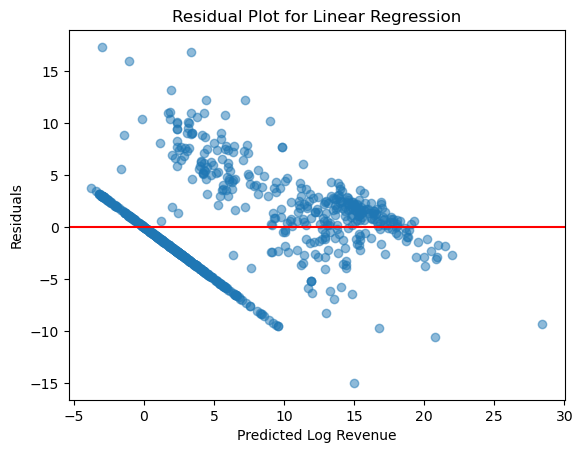

In [161]:
import matplotlib.pyplot as plt

# residuals
residuals_lr = y_test - y_pred_lr

plt.scatter(y_pred_lr, residuals_lr, alpha=0.5)
plt.axhline(0, color='red')
plt.xlabel("Predicted Log Revenue")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linear Regression")
plt.savefig("residual_plot_linear_regression.png", dpi=300)
plt.show()


Random Forest

The residuals are not random. The model is not able to fit the data very well and it is missing important patterns

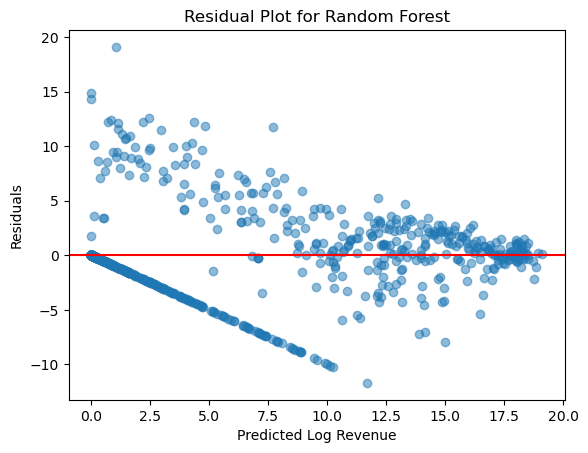

In [163]:
residuals_rf = y_test - y_pred_rf

plt.scatter(y_pred_rf, residuals_rf, alpha=0.5)
plt.axhline(0, color='red')
plt.xlabel("Predicted Log Revenue")
plt.ylabel("Residuals")
plt.title("Residual Plot for Random Forest")
plt.savefig("residual_plot_random_forest.png", dpi=300)
plt.show()


For movies with a higher predicted revenue the model seems to perform well, but has trouble with movies that have a low predicted revenue

Gradient Boosting

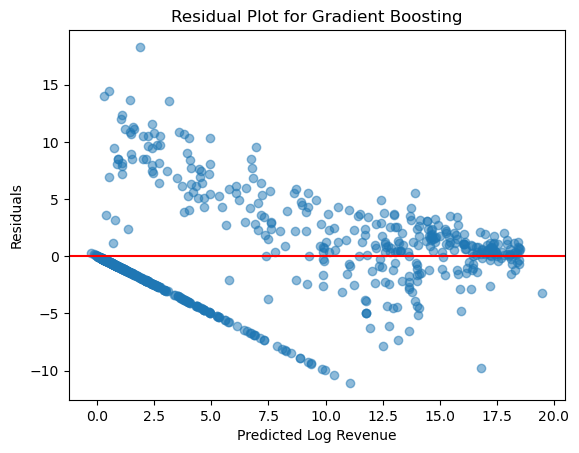

In [165]:
residuals_gbr = y_test - y_pred_gbr

plt.scatter(y_pred_gbr, residuals_gbr, alpha=0.5)
plt.axhline(0, color='red')
plt.xlabel("Predicted Log Revenue")
plt.ylabel("Residuals")
plt.title("Residual Plot for Gradient Boosting")
plt.savefig("residual_plot_gradient_boosting.png", dpi=300)

plt.show()


For movies with a higher predicted revenue the model seems to perform well, but has trouble with movies that have a low predicted revenue

#### Residual Randomness and Heteroscedasticity Summary

Overall it is clear that the residuals are the least random for the linear regression model, and are random for movies with a higher predicted log revenue for the random forest and gradient boosting models. But for all the models it is clear that they fail with movies with a lower predicted log revenue. All models residual plots show heteroscedasticity because the spread and behavior of the residuals change depending on the predicted revenue level.



Model Comparison

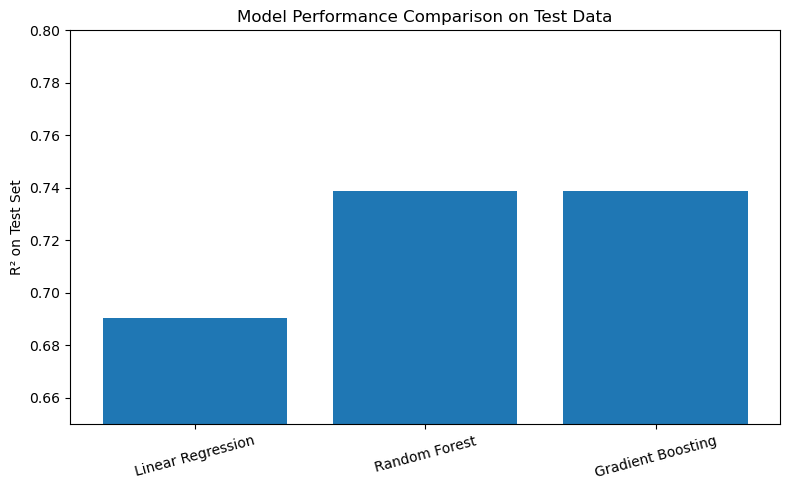

In [150]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']

# R² scores for each model (you already calculated these)
r2_scores = [r2_lr, r2_rf, r2_gbr]

# Set up positions for the bars
x = np.arange(len(models))

plt.figure(figsize=(8, 5))

# Create bar chart
plt.bar(x, r2_scores)

# Add labels and title
plt.xticks(x, models, rotation=15)
plt.ylabel("R² on Test Set")
plt.ylim(0.65, 0.80)  # zoomed scale to show the differences more clearly
plt.title("Model Performance Comparison on Test Data")

plt.tight_layout()
plt.savefig("model_r2_comparison.png", dpi=300, bbox_inches="tight")
plt.show()


#### Feature Importance

In [123]:

# Get feature importances from Gradient Boosting since that model generalizes the best
importances = gbr.feature_importances_

# Match importances to column names
feature_importance = pd.Series(importances, index=X_train.columns)

# Sorting them from most to least important
feature_importance = feature_importance.sort_values(ascending=False)

# Show the top 15
feature_importance.head(15)

votes_imdb_final     0.452391
log_votes            0.243747
log_budget           0.142180
budget_final         0.084318
region_final_TR      0.030827
rating_imdb_final    0.009147
runtime_final        0.008823
language_final_tr    0.006049
region_final_US      0.003869
language_final_hi    0.003015
language_final_vi    0.001420
region_final_KR      0.001349
region_final_CN      0.001171
region_final_VN      0.001122
language_final_en    0.000978
dtype: float64

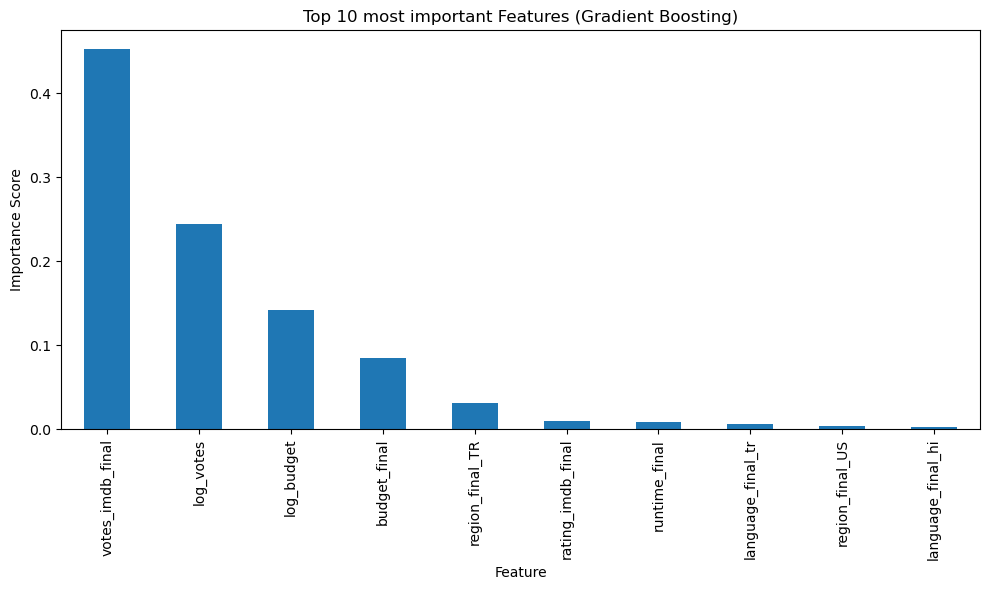

In [121]:
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(kind='bar')
plt.title("Top 10 most important Features (Gradient Boosting)")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()


More polished version

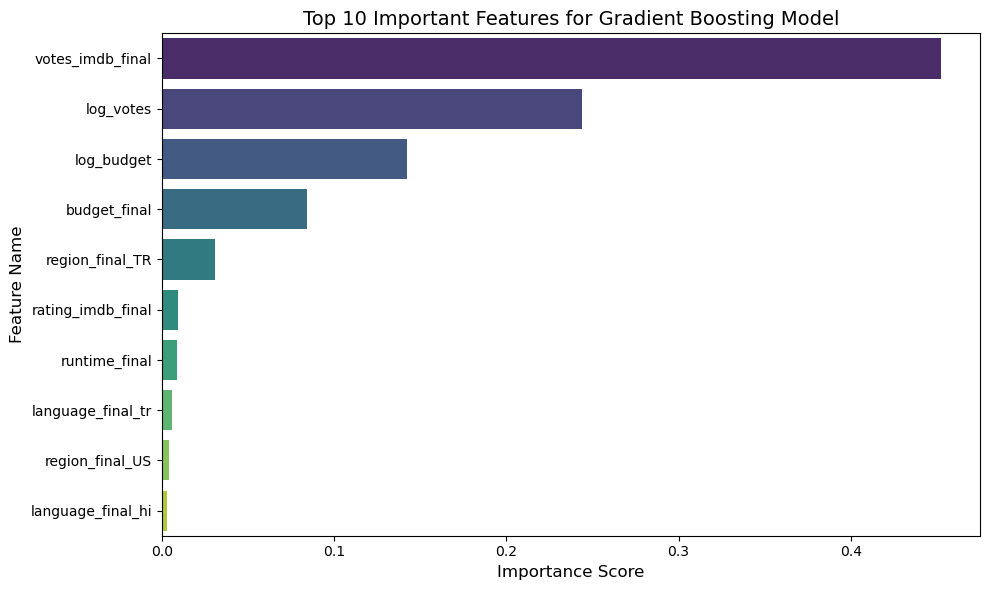

In [142]:
import seaborn as sns

# Calculate feature importance
importances = pd.Series(gbr.feature_importances_, index=X_train.columns)

# Sort values and select top 10
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))

# FIX: explicitly set hue = y-variable and legend = False
sns.barplot(
    x=top_features.values,
    y=top_features.index,
    hue=top_features.index,
    palette="viridis",
    legend=False
)

plt.title("Top 10 Important Features for Gradient Boosting Model", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature Name", fontsize=12)
plt.tight_layout()
plt.savefig("feature_importance_gbr.png", dpi=300, bbox_inches="tight")
plt.show()

Residuals vs predicted plot (Gradient Boosting)

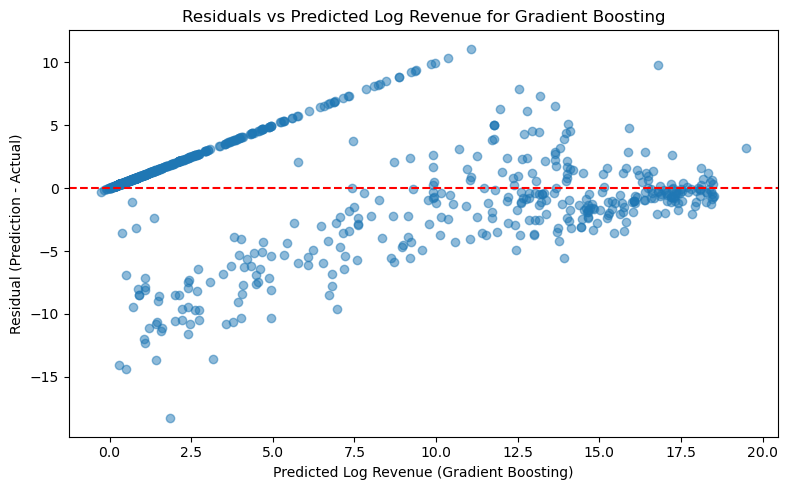

In [144]:

# Residuals for gradient boosting: prediction minus actual
residuals_gbr = y_pred_gbr - y_test

plt.figure(figsize=(8, 5))

# Scatter plot: predicted on x axis, residuals on y axis
plt.scatter(y_pred_gbr, residuals_gbr, alpha=0.5)

# Add a horizontal line at 0 to show perfect predictions
plt.axhline(0, color='red', linestyle='--')

plt.xlabel("Predicted Log Revenue (Gradient Boosting)")
plt.ylabel("Residual (Prediction - Actual)")
plt.title("Residuals vs Predicted Log Revenue for Gradient Boosting")

plt.tight_layout()
plt.savefig("model_r2_comparison.png", dpi=300, bbox_inches="tight")
plt.show()


Actual vs Predicted Log Revenue for Gradient Boosting

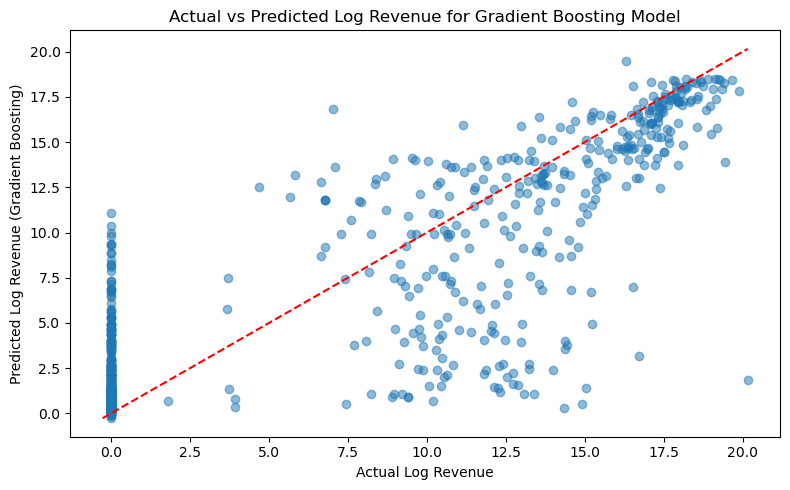

In [154]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.scatter(y_test, y_pred_gbr, alpha=0.5, color="tab:blue")

# Perfect prediction line
min_val = min(y_test.min(), y_pred_gbr.min())
max_val = max(y_test.max(), y_pred_gbr.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.xlabel("Actual Log Revenue")
plt.ylabel("Predicted Log Revenue (Gradient Boosting)")
plt.title("Actual vs Predicted Log Revenue for Gradient Boosting Model")

plt.tight_layout()

# save image
plt.savefig("gbr_actual_vs_pred.png", dpi=300, bbox_inches="tight")

plt.show()


Checking the mispredictions

In [127]:
# Make a copy of X_test so we can attach errors to each row
results_gbr = X_test.copy()

# Add the true and predicted log revenue
results_gbr['actual_log_revenue'] = y_test
results_gbr['pred_log_revenue_gbr'] = y_pred_gbr

# Residual = prediction - actual
results_gbr['residual'] = results_gbr['pred_log_revenue_gbr'] - results_gbr['actual_log_revenue']

# Absolute error so we can sort by size of mistake
results_gbr['abs_error'] = results_gbr['residual'].abs()

# Take the 10 worst predictions
worst_gbr = results_gbr.sort_values('abs_error', ascending=False).head(10)
worst_gbr.head()



,budget_final,rating_imdb_final,votes_imdb_final,runtime_final,log_budget,log_votes,language_final_ar,language_final_bg,language_final_bn,language_final_bs,...,release_month_final_7.0,release_month_final_8.0,release_month_final_9.0,release_month_final_10.0,release_month_final_11.0,release_month_final_12.0,actual_log_revenue,pred_log_revenue_gbr,residual,abs_error
24975,0.0,3.500000,264.0,89.0,0.0,5.579730,False,False,False,False,...,False,False,False,False,False,True,20.160491,1.863806,-18.296685,18.296685
35069,0.0,5.267527,0.0,94.0,0.0,0.000000,False,False,False,False,...,False,False,True,False,False,False,14.911095,0.503839,-14.407256,14.407256
9706,0.0,5.267527,0.0,91.0,0.0,0.000000,False,False,False,False,...,False,False,False,True,False,False,14.340737,0.302190,-14.038546,14.038546
33059,0.0,6.800000,44.0,118.0,0.0,3.806662,False,False,False,False,...,False,False,False,False,False,False,15.048857,1.421665,-13.627191,13.627191
31161,0.0,4.000000,24.0,91.0,0.0,3.218876,False,False,False,False,...,False,False,False,True,False,False,16.704273,3.152216,-13.552058,13.552058


In [129]:
# Grab title and revenue info from the original dataframe
movie_info = horror_data[['title_final', 'year_final', 'revenue_total_final']]

# Select those rows for the worst 10 indices
worst_titles = movie_info.loc[worst_gbr.index].copy()

# Combine title info with the error info
worst_with_titles = worst_titles.join(
    worst_gbr[['actual_log_revenue', 'pred_log_revenue_gbr', 'residual', 'abs_error']]
)

worst_with_titles


,title_final,year_final,revenue_total_final,actual_log_revenue,pred_log_revenue_gbr,residual,abs_error
24975,The Little Mermaid,2024.0,569626289.0,20.160491,1.863806,-18.296685,18.296685
35069,Karada Sagashi: The Last Night,2025.0,2990930.0,14.911095,0.503839,-14.407256,14.407256
9706,The Legend of Johnny Jones,2025.0,1690840.0,14.340737,0.302190,-14.038546,14.038546
33059,The Guardian Demon,2025.0,3432695.0,15.048857,1.421665,-13.627191,13.627191
31161,Yuanyang Lou,2024.0,17971059.0,16.704273,3.152216,-13.552058,13.552058
34283,Homecam,2025.0,645472.0,13.377739,1.070164,-12.307575,12.307575
33678,Gory: A Horror Tale,2025.0,477968.0,13.077301,1.057899,-12.019402,12.019402
11092,The Dead Walk,2008.0,1200000.0,13.997833,2.405051,-11.592782,11.592782
28242,Ghost Island,2024.0,395099.0,12.886894,1.558983,-11.327912,11.327912
40769,The Containment,2024.0,226437.0,12.330226,1.198991,-11.131235,11.131235


View badly predicted movies with more data for context

In [136]:
# Get the indices of the worst-predicted rows
bad_idxs = worst_gbr.index

# Show ALL original columns for those movies
full_bad_movies = horror_data.loc[bad_idxs]

full_bad_movies


,tconst,title_final,year_final,release_date_final2,runtime_final,language_final,region_final,rating_imdb_final,votes_imdb_final,rated_final,budget_final,budget_final_source,revenue_domestic_final,revenue_international_final,revenue_worldwide_final,revenue_total_final,revenue_total_final_source,release_month_final
24975,tt27722894,The Little Mermaid,2024.0,2024-12-16,89.0,en,US,3.5,264.0,R,0.0,unified_budget_usd,NaN,NaN,569626289.0,569626289.0,unified_total_usd,12.0
35069,tt38219225,Karada Sagashi: The Last Night,2025.0,2025-09-05,94.0,NaN,NaN,NaN,NaN,NaN,0.0,unified_budget_usd,NaN,NaN,2990930.0,2990930.0,unified_total_usd,9.0
9706,tt10928904,The Legend of Johnny Jones,2025.0,2024-10-03,91.0,en,US,NaN,NaN,NaN,0.0,unified_budget_usd,NaN,NaN,1690840.0,1690840.0,unified_total_usd,10.0
33059,tt36414938,The Guardian Demon,2025.0,2025-06-20,118.0,en,US,6.8,44.0,NaN,0.0,unified_budget_usd,NaN,NaN,3432695.0,3432695.0,unified_total_usd,6.0
31161,tt34386163,Yuanyang Lou,2024.0,2024-10-31,NaN,zh,CN,4.0,24.0,NaN,0.0,unified_budget_usd,NaN,17971059.0,17971059.0,17971059.0,unified_total_usd,10.0
34283,tt37535870,Homecam,2025.0,2025-09-10,93.0,NaN,KR,NaN,NaN,NaN,0.0,unified_budget_usd,NaN,NaN,645472.0,645472.0,unified_total_usd,9.0
33678,tt37024184,Gory: A Horror Tale,2025.0,2025-09-17,96.0,en,KR,NaN,NaN,NaN,0.0,unified_budget_usd,NaN,NaN,477968.0,477968.0,unified_total_usd,9.0
11092,tt1189032,The Dead Walk,2008.0,2008-06-06,NaN,en,US,5.9,48.0,Not Rated,50000.0,unified_budget_usd,NaN,NaN,1200000.0,1200000.0,unified_total_usd,6.0
28242,tt31474662,Ghost Island,2024.0,2024-10-10,95.0,en,US,6.8,63.0,NaN,0.0,unified_budget_usd,NaN,266126.0,266126.0,395099.0,unified_total_usd,10.0
40769,tt6415126,The Containment,2024.0,2025-06-05,82.0,en,US,4.9,102.0,NaN,0.0,unified_budget_usd,NaN,NaN,226437.0,226437.0,unified_total_usd,6.0


It looks like there are zeros in the budget data and it is affecting the predictions

Saving the models

In [169]:
from joblib import dump

dump(lr,  "linear_regression_model.pkl",  compress=3)
dump(rf,  "random_forest_model.pkl",      compress=3)
dump(gbr, "gradient_boosting_model.pkl",  compress=3)


['gradient_boosting_model.pkl']

In [ ]:
Saving model results

In [159]:
import json

results = {
    "linear_regression": {
        "rmse": float(rmse_lr),
        "mae": float(mae_lr),
        "r2": float(r2_lr)
    },
    "random_forest": {
        "rmse": float(rmse_rf),
        "mae": float(mae_rf),
        "r2": float(r2_rf)
    },
    "gradient_boosting": {
        "rmse": float(rmse_gbr),
        "mae": float(mae_gbr),
        "r2": float(r2_gbr)
    }
}

with open("model_results.json", "w") as f:
    json.dump(results, f, indent=4)
